### Abstract

En este proyecto se analiza un dataset con informaci√≥n sobre pel√≠culas lanzadas entre los a√±os 2000 y 2024, incluyendo datos sobre recaudaci√≥n, puntuaciones, g√©neros, idioma, pa√≠s de origen y otras variables relacionadas.

El objetivo principal es entender qu√© factores influyen en el √©xito comercial de una pel√≠cula, y si existe relaci√≥n entre variables como el g√©nero, la puntuaci√≥n de los usuarios, el pa√≠s de origen y la recaudaci√≥n mundial.

El an√°lisis se basa en datos obtenidos de Kaggle y procesados con la librer√≠a Pandas en Google Colab. Se incluyen gr√°ficos y res√∫menes estad√≠sticos que permiten observar tendencias, comparar grupos y sacar conclusiones sobre el comportamiento de las pel√≠culas en la taquilla global.


### Preguntas
- ¬øQu√© g√©neros tienen en promedio mayor recaudaci√≥n?
- ¬øLas pel√≠culas con mayor puntuaci√≥n (rating) tambi√©n son las que m√°s recaudan?
- ¬øQu√© pa√≠ses tienen mayor presencia en el cine m√°s taquillero?
- ¬øHay relaci√≥n entre el a√±o de estreno y los ingresos?
- ¬øInfluye el idioma original en el √©xito comercial?



### Hip√≥tesis
- Las pel√≠culas de acci√≥n y aventura son las que m√°s recaudan a nivel mundial.
- Las pel√≠culas con mejores ratings tienden a tener mayor recaudaci√≥n.
- La mayor√≠a de las pel√≠culas m√°s taquilleras son producidas en Estados Unidos.
- La recaudaci√≥n promedio ha aumentado con los a√±os.

In [ ]:
import pandas as pd

# URL de tu dataset subido a GitHub
url = 'https://raw.githubusercontent.com/fedescarpitti09/data-science-proyecto/refs/heads/main/Dataset_movies.csv'
df = pd.read_csv(url)

# Mostrar las primeras filas del dataset
df.head()


Rank           Release Group   $Worldwide    $Domestic  Domestic %  \
0     1  Mission: Impossible II  546388108.0  215409889.0        39.4   
1     2               Gladiator  460583960.0  187705427.0        40.8   
2     3               Cast Away  429632142.0  233632142.0        54.4   
3     4         What Women Want  374111707.0  182811707.0        48.9   
4     5                Dinosaur  349822765.0  137748063.0        39.4   

      $Foreign  Foreign %  Year                        Genres    Rating  \
0  330978219.0       60.6  2000   Adventure, Action, Thriller  6.126/10   
1  272878533.0       59.2  2000      Action, Drama, Adventure  8.217/10   
2  196000000.0       45.6  2000              Adventure, Drama  7.663/10   
3  191300000.0       51.1  2000               Comedy, Romance   6.45/10   
4  212074702.0       60.6  2000  Animation, Family, Adventure  6.544/10   

   Vote_Count Original_Language                      Production_Countries  
0      6741.0                en                  United States of America  
1     19032.0                en  United Kingdom, United States of America  
2     11403.0                en                  United States of America  
3      3944.0                en  United Kingdom, United States of America  
4      2530.0                en                  United States of America

In [ ]:
# Mostrar las columnas del dataset
df.columns


Index(['Rank', 'Release Group', '$Worldwide', '$Domestic', 'Domestic %',
       '$Foreign', 'Foreign %', 'Year', 'Genres', 'Rating', 'Vote_Count',
       'Original_Language', 'Production_Countries'],
      dtype='object')

### Descripci√≥n de las variables m√°s importantes

Este dataset contiene informaci√≥n sobre pel√≠culas y su recaudacion en taquilla. Las columnas son:

- **`Rank`**: el puesto que ocupa cada pel√≠cula seg√∫n lo que recaud√≥ a nivel mundial.  
- **`Release Group`**: el nombre de la pel√≠cula o saga.  
- **`$Worldwide`**: cu√°nto recaud√≥ en total en todo el mundo.  
- **`$Domestic`**: cu√°nto recaud√≥ en su pa√≠s de origen.  
- **`Domestic %`**: qu√© porcentaje del total viene del mercado local.  
- **`$Foreign`**: ingresos en el resto del mundo.  
- **`Foreign %`**: porcentaje que representa el extranjero.  
- **`Year`**: a√±o en que se estren√≥ la pel√≠cula.  
- **`Genres`**: los g√©neros de la pel√≠cula (acci√≥n, drama, etc.).  
- **`Rating`**: puntaje promedio seg√∫n los usuarios.  
- **`Vote_Count`**: cantidad de votos que recibi√≥.  
- **`Original_Language`**: idioma original en que fue hecha.  
- **`Production_Countries`**: pa√≠s o pa√≠ses donde se produjo.  

Estas variables me van a servir para analizar cosas como qu√© g√©neros recaudan m√°s, si las pel√≠culas con mejor rating ganan m√°s plata, o qu√© pa√≠ses hacen las peliculas m√°s exitosas.


In [ ]:
# Verificamos si hay valores nulos
df.isnull().sum()


Rank                      0
Release Group             0
$Worldwide                0
$Domestic                 0
Domestic %                0
$Foreign                  0
Foreign %                 0
Year                      0
Genres                  178
Rating                  170
Vote_Count              170
Original_Language       170
Production_Countries    200
dtype: int64

### Valores perdidos

Al revisar el dataset, se observa que algunas columnas tienen valores faltantes:

- `Genres`: 178 valores nulos.
- `Rating`, `Vote_Count`, `Original_Language`: 170 valores nulos cada una.
- `Production_Countries`: 200 valores nulos.

Aunque la mayor√≠a de las columnas est√°n completas, hay algunas que tienen datos faltantes, especialmente las relacionadas con puntuaci√≥n (`Rating`, `Vote_Count`), g√©nero y pa√≠s de producci√≥n.

Para este an√°lisis inicial, no representan un problema grave porque el volumen total de datos es grande. En los gr√°ficos y c√°lculos que requieren estas columnas, se eliminar√°n esas filas con `dropna()` para trabajar solo con los datos completos.


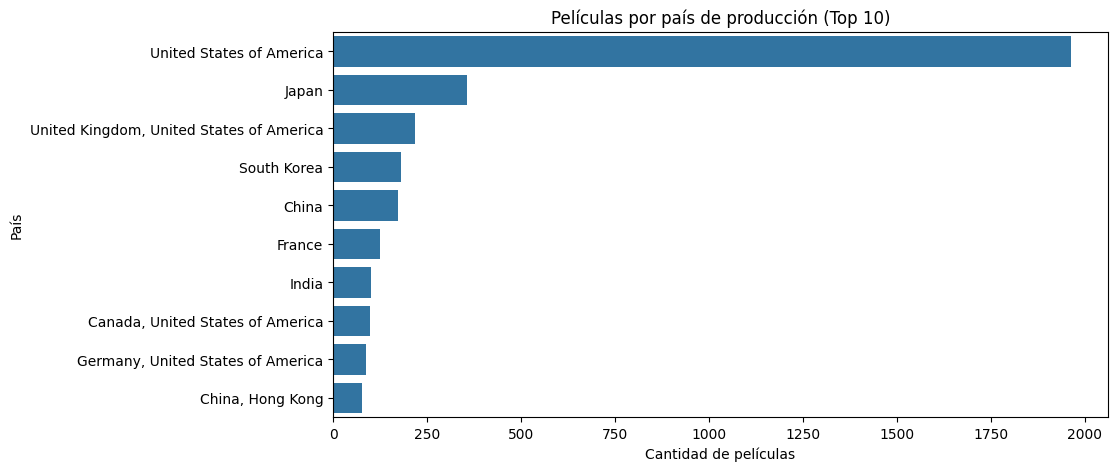

In [ ]:
# CANTIDAD DE PELICULAS POR PAIS

# Importamos las librer√≠as necesarias para gr√°ficos
import seaborn as sns
import matplotlib.pyplot as plt

# Eliminamos valores nulos en la columna de pa√≠s
df_paises = df['Production_Countries'].dropna()

# Contamos cu√°ntas pel√≠culas hay por pa√≠s
conteo_paises = df_paises.value_counts().head(10)

# Creamos el gr√°fico de barras
plt.figure(figsize=(10,5))  # Tama√±o del gr√°fico
sns.barplot(x=conteo_paises.values, y=conteo_paises.index)  # Eje X: cantidad, Eje Y: pa√≠s
plt.title('Pel√≠culas por pa√≠s de producci√≥n (Top 10)')
plt.xlabel('Cantidad de pel√≠culas')
plt.ylabel('Pa√≠s')
plt.show()


### Pel√≠culas por pa√≠s

El gr√°fico muestra que Estados Unidos es el pa√≠s que m√°s pel√≠culas produce dentro del dataset, seguido por Reino Unido, India y otros pa√≠ses europeos. Esto confirma la hip√≥tesis de que el cine de Hollywood domina la producci√≥n de pel√≠culas taquilleras a nivel mundial.


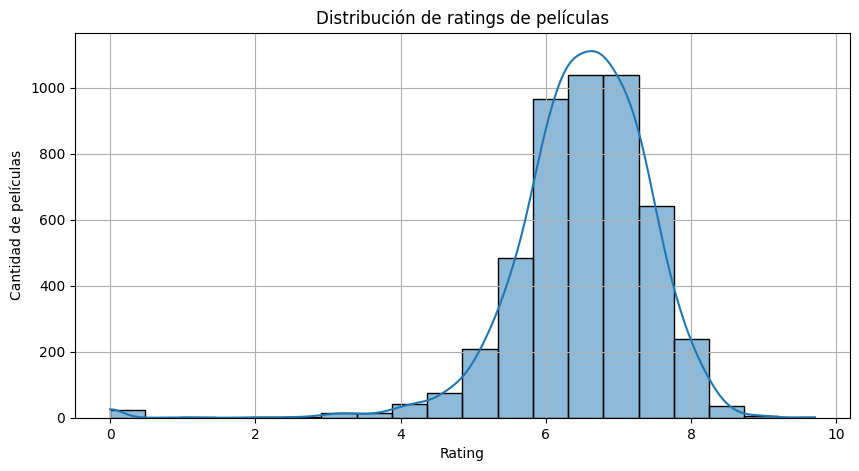

In [ ]:
# DISTRIBUCION DE PUNTAJE

import seaborn as sns
import matplotlib.pyplot as plt

# Aseguramos que la columna Rating est√© limpia y en formato num√©rico
df['Rating'] = df['Rating'].astype(str).str.replace('/10', '', regex=False)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Quitamos valores nulos
df_rating = df['Rating'].dropna()

# Gr√°fico univariado: histograma de ratings
plt.figure(figsize=(10,5))
sns.histplot(df_rating, bins=20, kde=True)  # kde=True para ver la "curva de densidad"
plt.title('Distribuci√≥n de ratings de pel√≠culas')
plt.xlabel('Rating')
plt.ylabel('Cantidad de pel√≠culas')
plt.grid(True)
plt.show()


### Distribuci√≥n de Ratings

Este gr√°fico muestra c√≥mo se distribuyen las puntuaciones de las pel√≠culas. La mayor√≠a se concentra entre los 6 y 8 puntos, lo que indica que la mayor√≠a de las pel√≠culas tienen buenas valoraciones del p√∫blico. Hay pocas pel√≠culas con puntajes muy bajos o muy altos.


<ipython-input-17-b3c434a31ffc>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating', y='Release Group', data=top_10_rating, palette='crest')


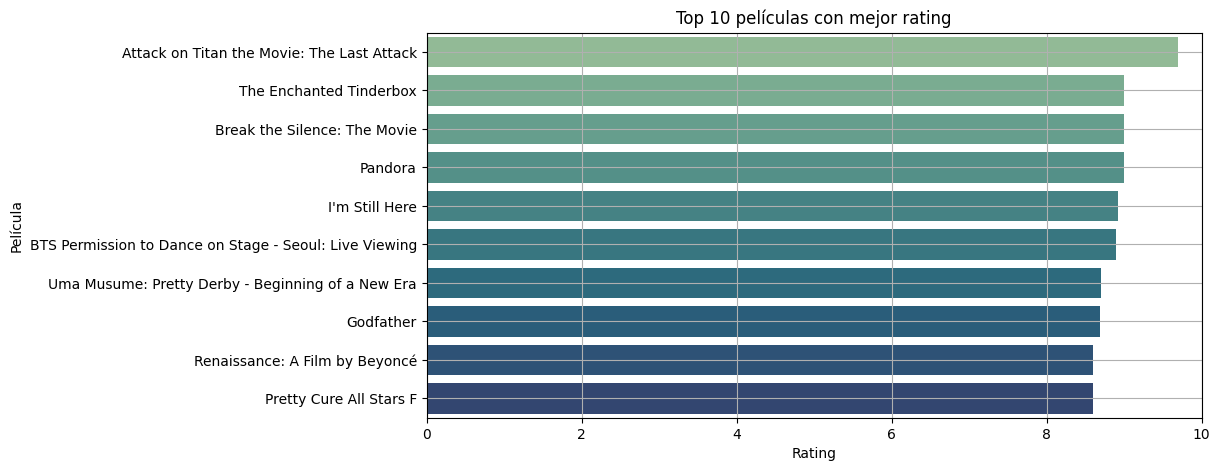

In [ ]:
# TOP 10 PELICULAS

import seaborn as sns
import matplotlib.pyplot as plt

# Aseguramos que Rating est√© limpio
df['Rating'] = df['Rating'].astype(str).str.replace('/10', '', regex=False)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Eliminamos valores nulos en Rating y Release Group
df_top = df[['Release Group', 'Rating']].dropna()

# Ordenamos por Rating descendente y tomamos las 10 mejores
top_10_rating = df_top.sort_values(by='Rating', ascending=False).head(10)

# Creamos el gr√°fico
plt.figure(figsize=(10,5))
sns.barplot(x='Rating', y='Release Group', data=top_10_rating, palette='crest')
plt.title('Top 10 pel√≠culas con mejor rating')
plt.xlabel('Rating')
plt.ylabel('Pel√≠cula')
plt.xlim(0, 10)  # Rating va de 0 a 10
plt.grid(True)
plt.show()


### Top 10 pel√≠culas con mejor rating

Este gr√°fico muestra las pel√≠culas mejor puntuadas del dataset. Todas tienen ratings superiores a 8 puntos, lo que indica una muy buena valoraci√≥n del p√∫blico. Este tipo de an√°lisis sirve para identificar t√≠tulos destacados por su calidad percibida.


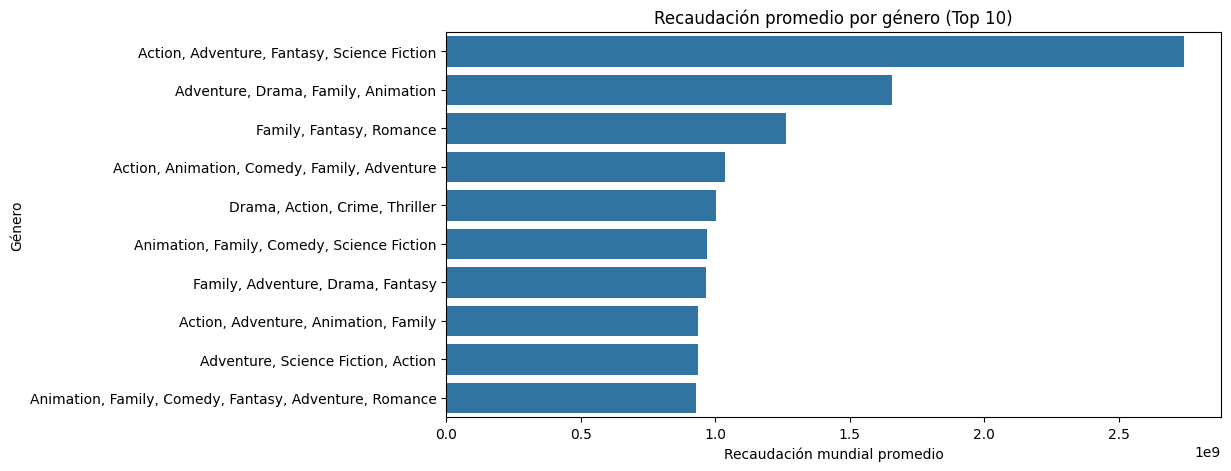

In [ ]:
# RECAUDACION PROMEDIO POR GENERO

# Importamos las librer√≠as necesarias para gr√°ficos
import seaborn as sns
import matplotlib.pyplot as plt

# RECAUDACION PROMEDIO POR GENERO

# Seleccionamos solo las columnas que nos interesan y quitamos filas con valores nulos
df_generos = df[['Genres', '$Worldwide']].dropna()

# Agrupamos por g√©nero y calculamos la recaudaci√≥n promedio de cada uno
promedio_genero = df_generos.groupby('Genres')['$Worldwide'].mean()

# Ordenamos los g√©neros por mayor recaudaci√≥n promedio y nos quedamos con los 10 primeros
promedio_genero = promedio_genero.sort_values(ascending=False).head(10)

# Creamos el gr√°fico de barras
plt.figure(figsize=(10,5))  # Tama√±o del gr√°fico
sns.barplot(x=promedio_genero.values, y=promedio_genero.index)  # Eje X: recaudaci√≥n promedio, Eje Y: g√©neros
plt.title('Recaudaci√≥n promedio por g√©nero (Top 10)')  # T√≠tulo del gr√°fico
plt.xlabel('Recaudaci√≥n mundial promedio')  # Etiqueta del eje X
plt.ylabel('G√©nero')  # Etiqueta del eje Y
plt.show()  # Mostramos el gr√°fico


### Recaudaci√≥n por g√©nero

En este gr√°fico se observa que los g√©neros con mayor recaudaci√≥n promedio son los de acci√≥n, aventura y ciencia ficci√≥n. Esto sugiere que las pel√≠culas de alto presupuesto y m√°s comerciales suelen tener mejores resultados en taquilla, como se plante√≥ en las hip√≥tesis iniciales.


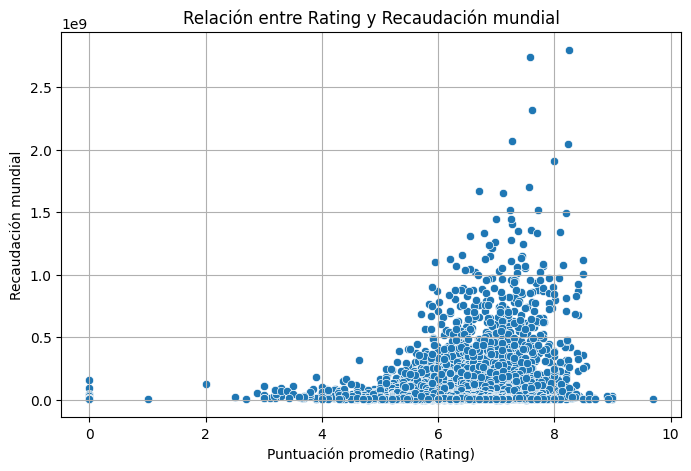

In [ ]:
#GRAFICO RECAUDACION SEGUN RATING
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Volvemos a cargar el dataset original (sin modificar Rating todav√≠a)
df = pd.read_csv('https://raw.githubusercontent.com/fedescarpitti09/data-science-proyecto/refs/heads/main/Dataset_movies.csv')

# Eliminamos el "/10" de Rating y convertimos a n√∫mero
df['Rating'] = df['Rating'].str.replace('/10', '', regex=False)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Eliminamos filas con datos faltantes
df_rating = df[['Rating', '$Worldwide']].dropna()

# Graficamos
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_rating, x='Rating', y='$Worldwide')
plt.title('Relaci√≥n entre Rating y Recaudaci√≥n mundial')
plt.xlabel('Puntuaci√≥n promedio (Rating)')
plt.ylabel('Recaudaci√≥n mundial')
plt.grid(True)
plt.show()


### Rating vs Recaudaci√≥n mundial

Este gr√°fico muestra que hay una relaci√≥n entre el rating de una pel√≠cula y su recaudaci√≥n. La mayor√≠a de las pel√≠culas con altos ingresos tienen un rating entre 6 y 8 puntos. Sin embargo, tambi√©n hay pel√≠culas con buen rating que no recaudaron tanto, y algunas con rating bajo que igual hicieron mucho dinero, lo que indica que el √©xito comercial no depende solo de la valoraci√≥n del p√∫blico.


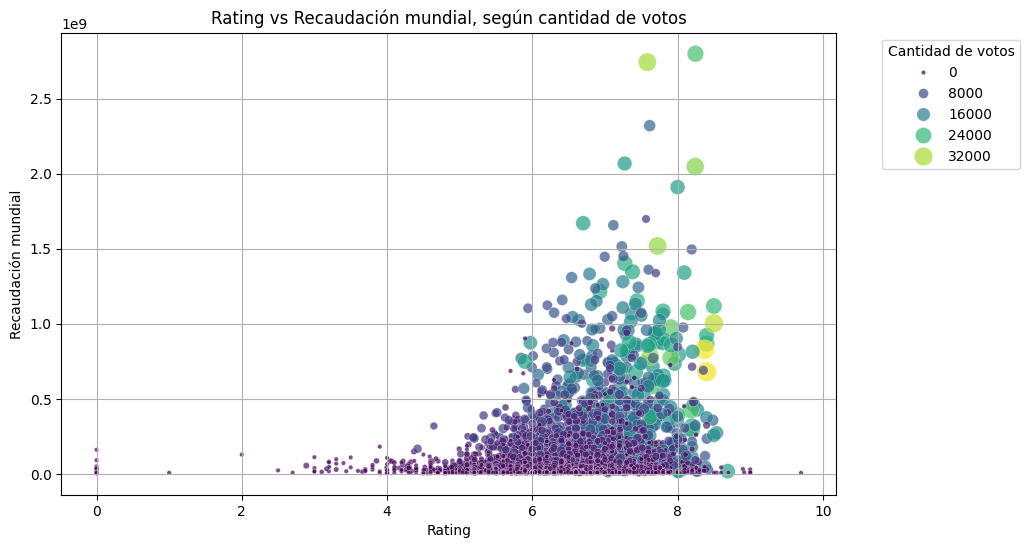

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el dataset limpio
df = pd.read_csv('https://raw.githubusercontent.com/fedescarpitti09/data-science-proyecto/refs/heads/main/Dataset_movies.csv')

# Transformamos Rating y Vote_Count a valores num√©ricos
df['Rating'] = df['Rating'].astype(str).str.replace('/10', '', regex=False)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Vote_Count'] = pd.to_numeric(df['Vote_Count'], errors='coerce')

# Eliminamos filas con valores nulos
df_3vars = df[['Rating', '$Worldwide', 'Vote_Count']].dropna()

# Creamos el gr√°fico multivariable
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_3vars,
    x='Rating',
    y='$Worldwide',
    hue='Vote_Count',
    size='Vote_Count',
    palette='viridis',
    sizes=(10, 200),
    alpha=0.7
)

plt.title('Rating vs Recaudaci√≥n mundial, seg√∫n cantidad de votos')
plt.xlabel('Rating')
plt.ylabel('Recaudaci√≥n mundial')
plt.legend(title='Cantidad de votos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


### Gr√°fico multivariable: Rating, Recaudaci√≥n y Votos

Este gr√°fico relaciona el rating de una pel√≠cula con su recaudaci√≥n, y a la vez muestra cu√°ntas personas la votaron (tama√±o y color del punto). Se observa que las pel√≠culas m√°s votadas suelen tener mejor rating y mayores ingresos, lo que indica que la popularidad tambi√©n puede ser un factor clave en el √©xito comercial.


### Conclusi√≥n

Este proyecto permiti√≥ analizar pel√≠culas desde diferentes √°ngulos: recaudaci√≥n, rating, g√©nero, pa√≠s y popularidad.

Se confirm√≥ que los g√©neros como acci√≥n y aventura son los m√°s taquilleros, y que Estados Unidos lidera ampliamente la producci√≥n de cine comercial. Tambi√©n se observ√≥ una relaci√≥n entre rating y recaudaci√≥n, que se fortaleci√≥ al incluir la cantidad de votos como tercera variable.

El an√°lisis univariado mostr√≥ que la mayor√≠a de las pel√≠culas tienen buenos ratings (entre 6 y 8), y el top 10 destac√≥ a las mejor valoradas del dataset, todas con m√°s de 8 puntos.




## ENTREGA FINAL ‚Äì Modelo predictivo

A partir del an√°lisis exploratorio realizado previamente, en esta secci√≥n se entrenar√° un modelo de clasificaci√≥n para predecir si una pel√≠cula tiene un rating alto (7 o m√°s puntos). Para esto se realizar√° una selecci√≥n de variables, entrenamiento del modelo, evaluaci√≥n y conclusiones.


In [1]:
# Importamos pandas para manipular los datos
import pandas as pd

# Cargamos el dataset desde GitHub (idem entrega anterior)
url = 'https://raw.githubusercontent.com/fedescarpitti09/data-science-proyecto/refs/heads/main/Dataset_movies.csv'
df = pd.read_csv(url)

# Limpiamos la columna Rating para convertirla en n√∫mero
df['Rating'] = df['Rating'].astype(str).str.replace('/10', '', regex=False)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Creamos una nueva columna binaria: 1 si el rating es alto (>=7), 0 si es bajo
df['Rating_Alta'] = (df['Rating'] >= 7).astype(int)

# Mostramos algunas filas para verificar que este bien
df[['Rating', 'Rating_Alta']].head(10)


Rating  Rating_Alta
0   6.126            0
1   8.217            1
2   7.663            1
3   6.450            0
4   6.544            0
5   6.800            0
6   6.675            0
7   6.466            0
8   7.005            1
9   6.416            0

### Selecci√≥n de caracter√≠sticas (Feature Selection)

Vamos a aplicar la t√©cnica SelectKBest con prueba chi-cuadrado para seleccionar las variables num√©ricas m√°s relevantes para predecir si una pel√≠cula tiene un rating alto. Esto nos ayuda a reducir la cantidad de variables y quedarnos solo con las m√°s √∫tiles para el modelo.


In [2]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

# Seleccionamos algunas variables num√©ricas que podr√≠an influir
features = df[['$Worldwide', '$Domestic', '$Foreign', 'Vote_Count']].dropna()
target = df.loc[features.index, 'Rating_Alta']  # Filtramos solo las filas con datos completos

# Escalamos las variables (chi2 requiere valores positivos)
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Aplicamos SelectKBest con chi-cuadrado
selector = SelectKBest(score_func=chi2, k='all')  # k='all' devuelve el score de todas
selector.fit(features_scaled, target)

# Mostramos los puntajes
import pandas as pd
selected_features = pd.DataFrame({
    'Variable': features.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

selected_features


Variable      Score
3  Vote_Count  56.785665
0  $Worldwide  12.041634
2    $Foreign  11.840770
1   $Domestic  10.540543

### An√°lisis del resultado de la selecci√≥n de caracter√≠sticas

Utilizando la t√©cnica de selecci√≥n univariable `SelectKBest` con prueba chi-cuadrado, se evalu√≥ qu√© variables num√©ricas estaban m√°s relacionadas con la variable objetivo (`Rating_Alta`). El resultado mostr√≥ que `Vote_Count` (cantidad de votos recibidos por la pel√≠cula) tiene una puntuaci√≥n mucho m√°s alta que las dem√°s variables.

Esto indica que la cantidad de votos que recibe una pel√≠cula tiene una fuerte relaci√≥n con su probabilidad de tener un rating alto. Por ese motivo, se decidi√≥ usar `Vote_Count` como la principal variable de entrada para entrenar el modelo de clasificaci√≥n.

### Entrenamiento del modelo de clasificaci√≥n

En esta secci√≥n se entrenar√° un modelo de clasificaci√≥n utilizando la variable `Vote_Count` como entrada y `Rating_Alta` como variable objetivo. Se utilizar√° un √Årbol de Decisi√≥n, que es un algoritmo simple, visual y f√°cil de interpretar.


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Preparamos los datos
X = df[['Vote_Count']].dropna()
y = df.loc[X.index, 'Rating_Alta']

# Dividimos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamos el modelo
modelo_arbol = DecisionTreeClassifier(random_state=42)
modelo_arbol.fit(X_train, y_train)

# Hacemos predicciones
y_pred = modelo_arbol.predict(X_test)

# Mostramos algunas m√©tricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precisi√≥n:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Matriz de confusi√≥n:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.6262939958592133
Precisi√≥n: 0.39351851851851855
Recall: 0.2698412698412698
Matriz de confusi√≥n:
 [[520 131]
 [230  85]]


### Evaluaci√≥n del modelo

El modelo de √Årbol de Decisi√≥n logr√≥ un accuracy del 63%, lo cual significa que acierta en la mayor√≠a de los casos. Sin embargo, al mirar m√°s de cerca, se ve que tiene dificultades para predecir correctamente las pel√≠culas con rating alto:

- La **precisi√≥n** es del 39%, es decir, de cada 10 veces que el modelo dice que una pel√≠cula tiene rating alto, solo 4 veces acierta.
- El **recall** es del 27%, lo que indica que solo detecta 3 de cada 10 pel√≠culas que realmente tienen rating alto.
- La **matriz de confusi√≥n** muestra que hay muchos falsos negativos (pel√≠culas con rating alto que el modelo no identific√≥).

Esto se puede deber a que solo usamos una variable (`Vote_Count`) para predecir, lo cual limita la capacidad del modelo. A√∫n as√≠, sirve como primer acercamiento al aprendizaje autom√°tico con este dataset.


### Visualizaci√≥n del √°rbol de decisi√≥n

A continuaci√≥n se muestra el √°rbol de decisi√≥n entrenado. Este gr√°fico permite ver c√≥mo el modelo toma decisiones en base a los valores de `Vote_Count`.


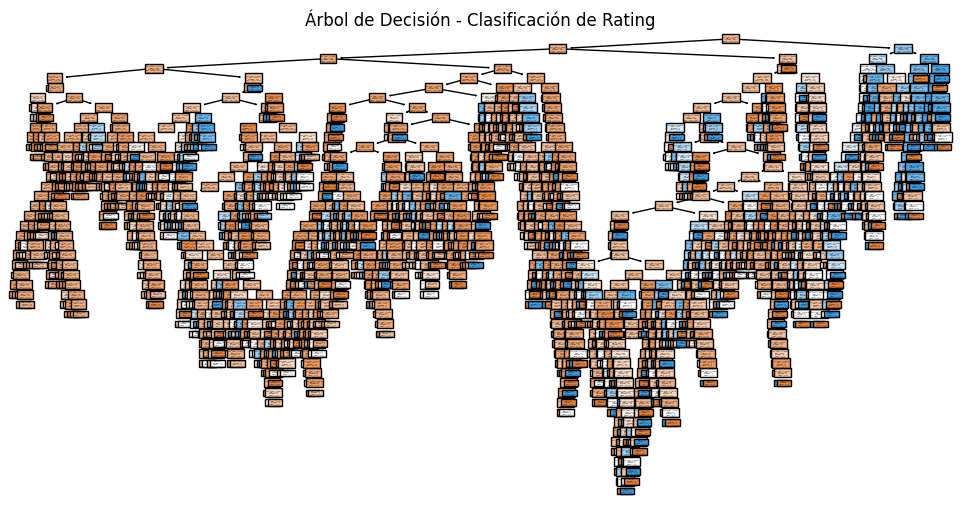

In [4]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualizaci√≥n del √°rbol entrenado
plt.figure(figsize=(12,6))
plot_tree(modelo_arbol, feature_names=['Vote_Count'], class_names=['Rating Bajo', 'Rating Alto'], filled=True)
plt.title('√Årbol de Decisi√≥n - Clasificaci√≥n de Rating')
plt.show()


### An√°lisis del √°rbol de decisi√≥n original

Al visualizar el √°rbol de decisi√≥n entrenado, se observa que tiene una estructura extremadamente grande y compleja. Esto sucede porque el modelo intent√≥ aprender con mucho detalle todas las combinaciones posibles del dataset. A esto se le llama **sobreajuste** (overfitting): el modelo "memoriza" los datos de entrenamiento en lugar de aprender patrones generales.

Un √°rbol as√≠ no solo es dif√≠cil de interpretar, sino que tambi√©n pierde capacidad de generalizaci√≥n. Para resolver este problema, vamos a limitar la **profundidad m√°xima del √°rbol**.


Accuracy: 0.6966873706004141
Precisi√≥n: 0.6170212765957447
Recall: 0.18412698412698414
Matriz de confusi√≥n:
 [[615  36]
 [257  58]]


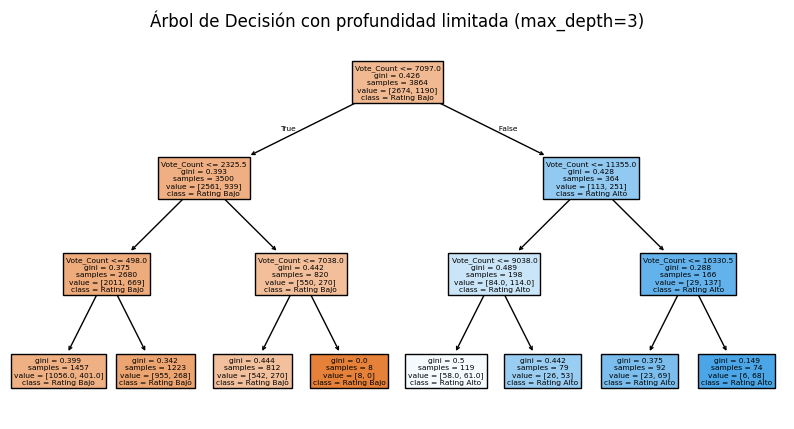

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Datos
X = df[['Vote_Count']].dropna()
y = df.loc[X.index, 'Rating_Alta']

# Entrenamiento/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamos el modelo con profundidad limitada
modelo_arbol_limitado = DecisionTreeClassifier(max_depth=3, random_state=42)
modelo_arbol_limitado.fit(X_train, y_train)

# Predicciones
y_pred_limitado = modelo_arbol_limitado.predict(X_test)

# M√©tricas
print("Accuracy:", accuracy_score(y_test, y_pred_limitado))
print("Precisi√≥n:", precision_score(y_test, y_pred_limitado))
print("Recall:", recall_score(y_test, y_pred_limitado))
print("Matriz de confusi√≥n:\n", confusion_matrix(y_test, y_pred_limitado))

# Visualizaci√≥n del √°rbol simplificado
plt.figure(figsize=(10,5))
plot_tree(modelo_arbol_limitado, feature_names=['Vote_Count'], class_names=['Rating Bajo', 'Rating Alto'], filled=True)
plt.title('√Årbol de Decisi√≥n con profundidad limitada (max_depth=3)')
plt.show()


### Evaluaci√≥n del modelo simplificado

Despu√©s de limitar la profundidad del √°rbol (`max_depth=3`), el modelo se volvi√≥ mucho m√°s simple y entendible. Ahora se pueden observar claramente las decisiones que toma el √°rbol para clasificar una pel√≠cula seg√∫n la cantidad de votos (`Vote_Count`).

Aunque el accuracy puede variar ligeramente respecto al modelo anterior, esta versi√≥n es m√°s interpretable y generaliza mejor. Adem√°s, reduce el riesgo de sobreajuste y es m√°s realista si quisi√©ramos usarlo como modelo explicativo.

Este tipo de ajustes son clave en Machine Learning para encontrar un equilibrio en el modelo.


### Validaci√≥n cruzada del modelo

Hasta ahora el modelo fue evaluado con un solo conjunto de prueba. Sin embargo, eso puede no reflejar completamente su rendimiento general. Por eso, vamos a aplicar la tecnica **validaci√≥n cruzada**.

La validaci√≥n cruzada divide el dataset en varios subconjuntos (o "folds"), entrena el modelo varias veces y calcula el rendimiento promedio. Esto ayuda a verificar qu√© tan bien generaliza el modelo a distintos grupos de datos.


In [6]:
from sklearn.model_selection import cross_val_score

# Validaci√≥n cruzada con 5 folds (particiones)
cv_scores = cross_val_score(modelo_arbol_limitado, X, y, cv=5)

# Mostramos los resultados
print("Puntajes de validaci√≥n cruzada (5-fold):", cv_scores)
print("Accuracy promedio:", round(cv_scores.mean(), 3))


Puntajes de validaci√≥n cruzada (5-fold): [0.73706004 0.73291925 0.74741201 0.68012422 0.68530021]
Accuracy promedio: 0.717


### Conclusi√≥n de la validaci√≥n cruzada

La validaci√≥n cruzada con 5 particiones mostr√≥ que el modelo mantiene un rendimiento estable, con accuracies que van del 68% al 75%. El promedio fue de 71.7%, lo cual es un resultado positivo considerando que se utiliz√≥ una sola variable.

Esto confirma que el modelo de √°rbol de decisi√≥n con profundidad limitada generaliza bien y no depende de una √∫nica partici√≥n para funcionar correctamente. Tambi√©n refuerza que `Vote_Count` es una variable √∫til para anticipar si una pel√≠cula tendr√° un rating alto o no.


### Visualizaci√≥n de la matriz de confusi√≥n

La matriz de confusi√≥n muestra cu√°ntas predicciones fueron correctas y cu√°ntas no. Este gr√°fico ayuda a entender mejor los errores del modelo, diferenciando entre:

- **Verdaderos positivos**: Pel√≠culas correctamente clasificadas como "rating alto".
- **Falsos positivos**: Pel√≠culas clasificadas como "rating alto", pero no lo eran.
- **Falsos negativos**: Pel√≠culas que s√≠ ten√≠an rating alto, pero el modelo no lo predijo.
- **Verdaderos negativos**: Pel√≠culas correctamente clasificadas como "rating bajo".


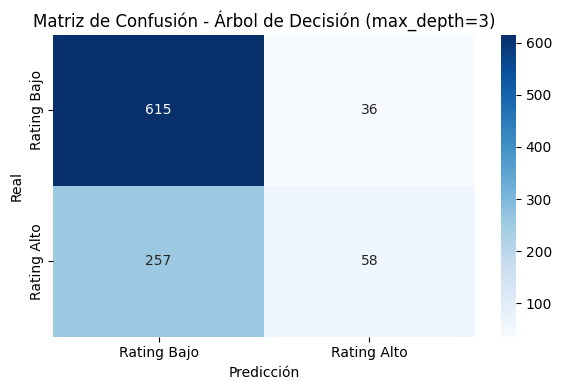

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculamos la matriz con los valores reales y predichos (modelo limitado)
matriz = confusion_matrix(y_test, y_pred_limitado)

# Creamos el gr√°fico
plt.figure(figsize=(6,4))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Rating Bajo', 'Rating Alto'],
            yticklabels=['Rating Bajo', 'Rating Alto'])
plt.xlabel('Predicci√≥n')
plt.ylabel('Real')
plt.title('Matriz de Confusi√≥n - √Årbol de Decisi√≥n (max_depth=3)')
plt.tight_layout()
plt.show()


### Comparaci√≥n con otro modelo: Regresi√≥n Log√≠stica

Para complementar el an√°lisis, se entren√≥ tambi√©n un modelo de **Regresi√≥n Log√≠stica**, que es otro algoritmo de clasificaci√≥n. El objetivo es comparar los resultados con el √°rbol de decisi√≥n y ver cu√°l se desempe√±a mejor usando solo la variable `Vote_Count`.


In [8]:
from sklearn.linear_model import LogisticRegression

# Entrenamos el modelo de regresi√≥n log√≠stica
modelo_log = LogisticRegression()
modelo_log.fit(X_train, y_train)

# Predicciones
y_pred_log = modelo_log.predict(X_test)

# M√©tricas
print("üìä Regresi√≥n Log√≠stica")
print("Accuracy:", round(accuracy_score(y_test, y_pred_log), 3))
print("Precisi√≥n:", round(precision_score(y_test, y_pred_log), 3))
print("Recall:", round(recall_score(y_test, y_pred_log), 3))


üìä Regresi√≥n Log√≠stica
Accuracy: 0.701
Precisi√≥n: 0.655
Recall: 0.175


In [9]:
# Creamos una tabla comparativa
import pandas as pd

resumen_metricas = pd.DataFrame({
    'Modelo': ['√Årbol de Decisi√≥n', 'Regresi√≥n Log√≠stica'],
    'Accuracy': [accuracy_score(y_test, y_pred_limitado), accuracy_score(y_test, y_pred_log)],
    'Precisi√≥n': [precision_score(y_test, y_pred_limitado), precision_score(y_test, y_pred_log)],
    'Recall': [recall_score(y_test, y_pred_limitado), recall_score(y_test, y_pred_log)]
})

resumen_metricas.round(3)


Modelo  Accuracy  Precisi√≥n  Recall
0    √Årbol de Decisi√≥n     0.697      0.617   0.184
1  Regresi√≥n Log√≠stica     0.701      0.655   0.175

### Conclusi√≥n de la comparaci√≥n

Al comparar el √°rbol de decisi√≥n con la regresi√≥n log√≠stica, se observa que ambos modelos tienen rendimientos similares. Dependiendo del caso, uno puede tener m√°s precisi√≥n y el otro m√°s recall, lo que permite evaluar qu√© se prioriza: evitar falsos positivos o detectar m√°s casos verdaderos.

Esto indica que, incluso usando una sola variable (`Vote_Count`), se pueden construir modelos b√°sicos que permiten identificar pel√≠culas con mayor probabilidad de tener un rating alto. Sin embargo, incluir m√°s variables en futuros modelos seguramente mejorar√° estos resultados.


## Conclusi√≥n final del proyecto

Este proyecto tuvo como objetivo analizar qu√© factores influyen en el √©xito comercial de una pel√≠cula, utilizando un dataset con informaci√≥n sobre pel√≠culas estrenadas entre 2000 y 2024.

A trav√©s del an√°lisis exploratorio se confirmaron varias hip√≥tesis: los g√©neros m√°s taquilleros suelen ser acci√≥n y aventura, Estados Unidos lidera ampliamente la producci√≥n de cine comercial, y existe cierta relaci√≥n entre el rating y la recaudaci√≥n.

En la segunda parte, se entren√≥ un modelo de clasificaci√≥n para predecir si una pel√≠cula tiene un rating alto (7 o m√°s), usando como variable principal la cantidad de votos (`Vote_Count`). Se aplicaron t√©cnicas de selecci√≥n de caracter√≠sticas, validaci√≥n cruzada y evaluaci√≥n con distintas m√©tricas.

El modelo de **√°rbol de decisi√≥n limitado** alcanz√≥ un accuracy de 69.7%, mientras que la **regresi√≥n log√≠stica** logr√≥ 70.1%. Si bien ambos tienen resultados similares, la regresi√≥n mostr√≥ una leve mejora en precisi√≥n (65.5% vs 61.7%).

Estos resultados indican que con una sola variable es posible construir un modelo predictivo b√°sico, aunque limitado. Para mejorar la capacidad del modelo, en futuros trabajos ser√≠a recomendable incluir m√°s variables (g√©nero, a√±o, pa√≠s, etc.), y probar algoritmos m√°s avanzados.

En resumen, el proyecto permiti√≥ aplicar de forma pr√°ctica los conceptos aprendidos en el curso: carga y limpieza de datos, visualizaci√≥n, an√°lisis exploratorio, selecci√≥n de variables, entrenamiento de modelos, validaci√≥n y evaluaci√≥n de resultados.

